## Linear regression plots

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import os

In [ ]:
clubs = [
    "Dinamo Zagreb", "Hajduk Split", "Varazdin", "Osijek", "Lokomotiva",
    "Slaven Belupo", "Rijeka", "Gorica", "Istra", "Sibenik"
]

In [ ]:
average_possession = [60.3, 54.3, 51.3, 50.9, 50.5, 49.6, 47.5, 47.2, 44.6, 43.8]

points_won = [29, 36, 26, 26, 19, 20, 36, 15, 19, 16]

xG = [1.8, 1.49, 1.41, 1.47, 1.49, 1.51, 1.48, 1.05, 1.17, 1.06]

scored_goals = [35, 28, 16, 28, 23, 21, 26, 16, 18, 15]

In [ ]:
def get_club_logo(path):
    logo = plt.imread(path)
    return OffsetImage(logo, zoom=1.0)

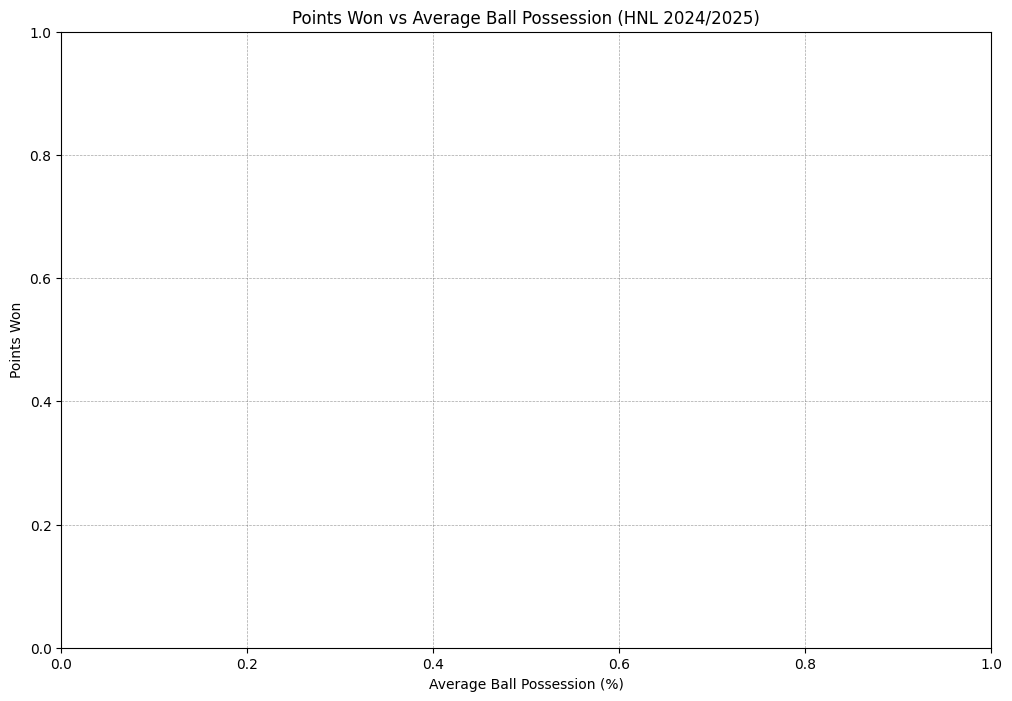

In [ ]:
plt.figure(figsize=(12, 8))
plt.title("Points Won vs Average Ball Possession (HNL 2024/2025)", color="black")
plt.xlabel("Average Ball Possession (%)", color="black")
plt.ylabel("Points Won", color="black")
plt.grid(color="gray", linestyle="--", linewidth=0.5, alpha=0.7)


In [ ]:
import os

input_folder = "/content/hnl"
print("Datoteke u direktoriju '/content/hnl':")
print(os.listdir(input_folder))

Datoteke u direktoriju '/content/hnl':
['hajduk_split.png', 'sibenik.png', 'lokomotiva.png', 'varazdin.png', 'rijeka.png', 'osijek.png', 'gorica.png', 'dinamo_zagreb.png', 'istra.png', 'slaven_belupo.png']


In [ ]:
from PIL import Image
import os

input_folder = "/content/hnl"
output_folder = "/content/scaled_hnl"
target_size = (20, 20)

os.makedirs(output_folder, exist_ok=True)

for file_name in os.listdir(input_folder):
    if file_name.lower().endswith(".png"):
        try:
            img_path = os.path.join(input_folder, file_name)
            img = Image.open(img_path)

            img_resized = img.resize(target_size, Image.Resampling.LANCZOS)

            output_path = os.path.join(output_folder, file_name)
            img_resized.save(output_path)
            print(f"Skalirana slika spremljena: {output_path}")
        except Exception as e:
            print(f"Greška pri obradi datoteke {file_name}: {e}")



Skalirana slika spremljena: /content/scaled_hnl/hajduk_split.png
Skalirana slika spremljena: /content/scaled_hnl/sibenik.png
Skalirana slika spremljena: /content/scaled_hnl/lokomotiva.png
Skalirana slika spremljena: /content/scaled_hnl/varazdin.png
Skalirana slika spremljena: /content/scaled_hnl/rijeka.png
Skalirana slika spremljena: /content/scaled_hnl/osijek.png
Skalirana slika spremljena: /content/scaled_hnl/gorica.png
Skalirana slika spremljena: /content/scaled_hnl/dinamo_zagreb.png
Skalirana slika spremljena: /content/scaled_hnl/istra.png
Skalirana slika spremljena: /content/scaled_hnl/slaven_belupo.png


In [ ]:
from IPython.display import Image as IPImage, display
for file_name in os.listdir(output_folder):
    if file_name.endswith((".png")):
        display(IPImage(os.path.join(output_folder, file_name)))

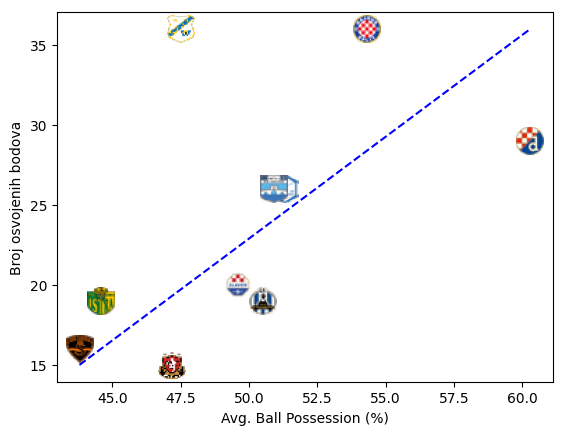

In [ ]:
scaled_logo_folder = "/content/scaled_hnl"

for i, club in enumerate(clubs):
    logo_path = os.path.join(scaled_logo_folder, f"{club.lower().replace(' ', '_')}.png")
    if os.path.exists(logo_path):
        imagebox = AnnotationBbox(get_club_logo(logo_path), (average_possession[i], points_won[i]), frameon=False)
        plt.gca().add_artist(imagebox)
    else:
        plt.scatter(average_possession[i], points_won[i], color="red", label=club)

plt.plot(
    [min(average_possession), max(average_possession)],
    [min(points_won), max(points_won)],
    color="blue", linestyle="--", label="Prosjek"
)

plt.xlabel("Avg. Ball Possession (%)")
plt.ylabel("Broj osvojenih bodova")
plt.show()

In [ ]:
x = np.array(average_possession).reshape(-1, 1)
y = np.array(points_won)
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [ ]:
m = model.coef_[0]  # Nagib
b = model.intercept_  # Presjek sa y-osom

# Izračun udaljenosti od pravca za svaku tačku
distances = [y_actual - (m * x_actual + b) for x_actual, y_actual in zip(average_possession, points_won)]
club_distances = list(zip(clubs, distances))

# Sortiranje od najveće pozitivne do najveće negativne udaljenosti
club_distances.sort(key=lambda x: x[1], reverse=True)

print("\nUdaljenosti od pravca za svih 10 klubova (sortirano):")
for club, dist in club_distances:
    sign = "+" if dist >= 0 else ""
    print(f"{sign}{dist:.1f} {club}")


Udaljenosti od pravca za svih 10 klubova (sortirano):
+13.9 Rijeka
+8.1 Hajduk Split
+1.0 Osijek
+0.7 Varazdin
-0.6 Istra
-2.9 Sibenik
-3.9 Slaven Belupo
-4.0 Dinamo Zagreb
-5.6 Lokomotiva
-6.8 Gorica


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [ ]:
x = np.array(average_possession).reshape(-1, 1)
y = np.array(points_won)
model = LinearRegression()
model.fit(x, y)

predicted_points = model.predict(x)

<ipython-input-50-13ad7b2319f0>:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()



Difference between points won and average ball possession:
+13.9 -> Rijeka
+8.1 -> Hajduk Split
+1.0 -> Osijek
+0.7 -> Varazdin
-0.6 -> Istra
-2.9 -> Sibenik
-3.9 -> Slaven Belupo
-4.0 -> Dinamo Zagreb
-5.6 -> Lokomotiva
-6.8 -> Gorica


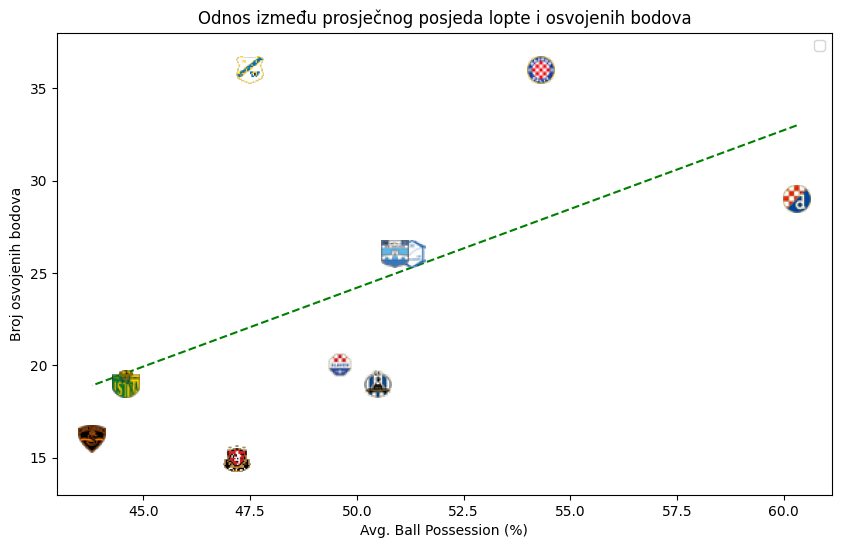

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(average_possession, predicted_points, color="green", linestyle="--")
plt.xlabel("Avg. Ball Possession (%)")
plt.ylabel("Broj osvojenih bodova")
plt.title("Odnos između prosječnog posjeda lopte i osvojenih bodova")
plt.legend()

scaled_logo_folder = "/content/scaled_hnl"

for i, club in enumerate(clubs):
    logo_path = os.path.join(scaled_logo_folder, f"{club.lower().replace(' ', '_')}.png")
    if os.path.exists(logo_path):
        imagebox = AnnotationBbox(get_club_logo(logo_path), (average_possession[i], points_won[i]), frameon=False)
        plt.gca().add_artist(imagebox)
    else:
        plt.scatter(average_possession[i], points_won[i], color="red", label=club)

plt.ylim(min(points_won)-2, max(points_won)+2)

print("\nDifference between points won and average ball possession:")
for club, dist in club_distances:
    sign = "+" if dist >= 0 else ""
    print(f"{sign}{dist:.1f} -> {club}")

plt.show()


<ipython-input-63-b24d4b143d85>:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


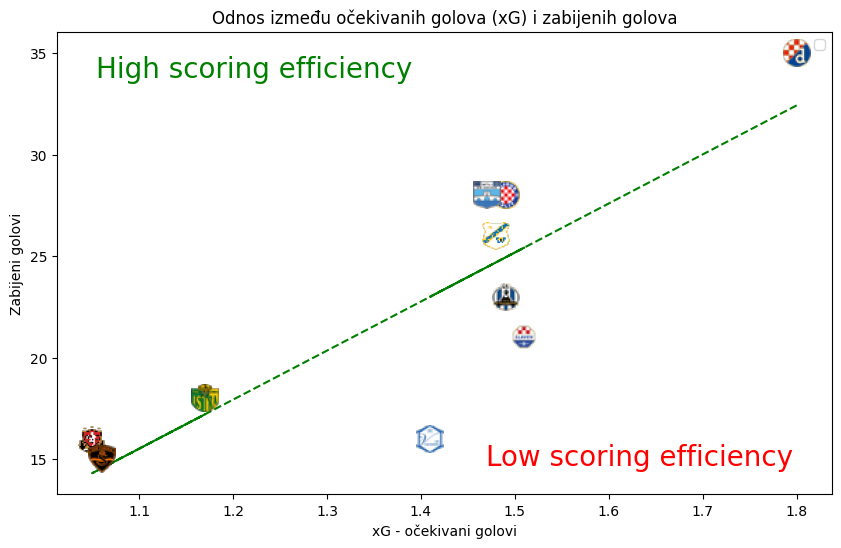

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import os
from PIL import Image
from IPython.display import Image as IPImage, display
import numpy as np
from sklearn.linear_model import LinearRegression

x = np.array(xG).reshape(-1, 1)
y = np.array(scored_goals)
model = LinearRegression()
model.fit(x, y)
predicted_goals = model.predict(x)

plt.figure(figsize=(10, 6))
plt.plot(xG, predicted_goals, color="green", linestyle="--")
plt.scatter(xG, scored_goals, color='blue')

plt.xlabel("xG - očekivani golovi")
plt.ylabel("Zabijeni golovi")
plt.title("Odnos između očekivanih golova (xG) i zabijenih golova")
plt.legend()


scaled_logo_folder = "/content/scaled_hnl"
for i, club in enumerate(clubs):
    logo_path = os.path.join(scaled_logo_folder, f"{club.lower().replace(' ', '_')}.png")
    if os.path.exists(logo_path):
        imagebox = AnnotationBbox(get_club_logo(logo_path), (xG[i], scored_goals[i]), frameon=False)
        plt.gca().add_artist(imagebox)
    else:
        plt.scatter(xG[i], scored_goals[i], color="red", label=club)


plt.text(0.05, 0.95, "High scoring efficiency", transform=plt.gca().transAxes, fontsize=20, verticalalignment='top', color='green')
plt.text(0.95, 0.05, "Low scoring efficiency", transform=plt.gca().transAxes, fontsize=20, horizontalalignment='right', verticalalignment='bottom', color='red')

plt.show()

In [ ]:
m = model.coef_[0]  # Nagib
b = model.intercept_  # Presjek sa y-osom

# Izračun udaljenosti od pravca za svaku tačku
distances = [y_actual - (m * x_actual + b) for x_actual, y_actual in zip(xG, scored_goals)]
club_distances = list(zip(clubs, distances))

# Sortiranje od najveće pozitivne do najveće negativne udaljenosti
club_distances.sort(key=lambda x: x[1], reverse=True)

print("\nDifference between goals and xG:")
for club, dist in club_distances:
    sign = "+" if dist >= 0 else ""
    print(f"{sign}{dist:.1f} {club}")


Difference between goals and xG:
+3.5 Osijek
+3.1 Hajduk Split
+2.6 Dinamo Zagreb
+1.7 Gorica
+1.3 Rijeka
+0.8 Istra
+0.4 Sibenik
-1.9 Lokomotiva
-4.4 Slaven Belupo
-7.0 Varazdin


## ELO-Based 10000 simulations


In [1]:
import random
import math
import numpy as np

In [2]:
def simulate_match(home_team_elo, away_team_elo, home_advantage=50, k=20):
    adjusted_home_elo = home_team_elo + home_advantage
    elo_diff = adjusted_home_elo - away_team_elo
    home_win_probability = 1 / (1 + math.pow(10, -elo_diff / 400))

    result = random.random()
    if result < home_win_probability:
        outcome = 1  # Home team wins
        home_score, away_score = 3, 0
    elif result < home_win_probability + 0.25:  # Assuming 25% chance of draw
        outcome = 0.5  # Draw
        home_score, away_score = 1, 1
    else:
        outcome = 0  # Away team wins
        home_score, away_score = 0, 3

    # Update Elo ratings
    elo_change = k * (outcome - home_win_probability)
    new_home_elo = home_team_elo + elo_change
    new_away_elo = away_team_elo - elo_change

    return home_score, away_score, new_home_elo, new_away_elo

In [3]:
def simulate_league(teams, fixtures, initial_points, k=20):
    points = initial_points.copy()
    current_elos = teams.copy()

    for home_team, away_team in fixtures:
        home_points, away_points, new_home_elo, new_away_elo = simulate_match(
            current_elos[home_team], current_elos[away_team], k=k
        )
        points[home_team] += home_points
        points[away_team] += away_points
        current_elos[home_team] = new_home_elo
        current_elos[away_team] = new_away_elo

    return points, current_elos


In [12]:
def run_multiple_simulations(teams, fixtures, initial_points, num_simulations, k=20):
    num_teams = len(teams)
    position_counts = {team: [0] * num_teams for team in teams}
    total_points = {team: 0 for team in teams}

    for _ in range(num_simulations):
        final_points, _ = simulate_league(teams, fixtures, initial_points, k=k)
        sorted_results = sorted(final_points.items(), key=lambda x: x[1], reverse=True)

        for position, (team, points) in enumerate(sorted_results):
            position_counts[team][position] += 1
            total_points[team] += points

    position_probabilities = {team: [count / num_simulations * 100 for count in counts]
                              for team, counts in position_counts.items()}
    average_points = {team: round(total / num_simulations) for team, total in total_points.items()}
    qualification_probabilities_top8 = {team: sum(probs[:1]) for team, probs in position_probabilities.items()}
    qualification_probabilities_top24 = {team: sum(probs[:4]) for team, probs in position_probabilities.items()}

    return position_probabilities, average_points, qualification_probabilities_top8, qualification_probabilities_top24

In [21]:
def print_results(position_probabilities, average_points, qualification_probabilities_top8, qualification_probabilities_top24):
    print("Šanse za osvajanje HNL-a i top 4")
    print("=" * 100)

    sorted_teams = sorted(average_points.items(), key=lambda x: x[1], reverse=True)

    print("Team".ljust(20) + "Proj. Points".ljust(15) + "Prvak (%)".ljust(20) + "Top 4 (%)")
    print("-" * 100)
    for team, points in sorted_teams:
        qual_prob_top8 = qualification_probabilities_top8[team]
        qual_prob_top24 = qualification_probabilities_top24[team]
        print(f"{team.ljust(20)}{points}".ljust(35) + f"{qual_prob_top8:.2f}".ljust(20) + f"{qual_prob_top24:.2f}")

    print("\nVjerojatnosti pozicija za svaki klub (%)")
    print("=" * 100)

    # Header
    print("Team".ljust(20) + "".join(f"{i:>8}" for i in range(1, 11)))
    print("-" * 100)

    # Data
    for team in sorted_teams:
        probs = position_probabilities[team[0]]
        print(f"{team[0].ljust(20)}" + "".join(f"{prob:>8.2f}" for prob in probs[:10]))

    print("=" * 100)


In [6]:
initial_points = {
    "Rijeka": 46,
    "Hajduk Split": 45,
    "D. Zagreb": 39,
    "Varazdin": 33,
    "Slaven Belupo": 32,
    "Osijek": 30,
    "Lok. Zagreb": 28,
    "Istra 1961": 28,
    "Gorica": 24,
    "Sibenik": 18
}

In [7]:
teams = {
    "D. Zagreb": 1527,
    "Rijeka": 1473,
    "Hajduk Split": 1468,
    "Osijek": 1385,
    "Lok. Zagreb": 1359,
    "Varazdin": 1321,
    "Istra 1961": 1312,
    "Slaven Belupo": 1303,
    "Gorica": 1268,
    "Sibenik": 1187
}

In [8]:
fixtures = [
    ("Rijeka", "Sibenik"), ("Varazdin", "Istra 1961"), ("Lok. Zagreb", "Osijek"),
    ("Hajduk Split", "Gorica"), ("Slaven Belupo", "D. Zagreb"), ("Gorica", "Slaven Belupo"),
    ("Sibenik", "Istra 1961"), ("D. Zagreb", "Lok. Zagreb"), ("Osijek", "Varazdin"),
    ("Rijeka", "Hajduk Split"), ("Hajduk Split", "Sibenik"), ("Istra 1961", "Osijek"),
    ("Lok. Zagreb", "Gorica"), ("Slaven Belupo", "Rijeka"), ("Varazdin", "D. Zagreb"),
    ("Istra 1961", "D. Zagreb"), ("Lok. Zagreb", "Rijeka"), ("Sibenik", "Osijek"),
    ("Slaven Belupo", "Hajduk Split"), ("Varazdin", "Gorica"), ("D. Zagreb", "Osijek"),
    ("Gorica", "Istra 1961"), ("Hajduk Split", "Lok. Zagreb"), ("Rijeka", "Varazdin"),
    ("Slaven Belupo", "Sibenik"), ("Istra 1961", "Rijeka"), ("Lok. Zagreb", "Slaven Belupo"),
    ("Osijek", "Gorica"), ("Sibenik", "D. Zagreb"), ("Varazdin", "Hajduk Split"),
    ("Gorica", "D. Zagreb"), ("Hajduk Split", "Istra 1961"), ("Lok. Zagreb", "Sibenik"),
    ("Rijeka", "Osijek"), ("Slaven Belupo", "Varazdin"), ("D. Zagreb", "Rijeka"),
    ("Istra 1961", "Slaven Belupo"), ("Osijek", "Hajduk Split"), ("Sibenik", "Gorica"),
    ("Varazdin", "Lok. Zagreb"), ("Hajduk Split", "D. Zagreb"), ("Lok. Zagreb", "Istra 1961"),
    ("Rijeka", "Gorica"), ("Slaven Belupo", "Osijek"), ("Varazdin", "Sibenik"),
    ("D. Zagreb", "Slaven Belupo"), ("Gorica", "Hajduk Split"), ("Istra 1961", "Varazdin"),
    ("Osijek", "Lok. Zagreb"), ("Sibenik", "Rijeka"), ("Hajduk Split", "Rijeka"),
    ("Istra 1961", "Sibenik"), ("Lok. Zagreb", "D. Zagreb"), ("Slaven Belupo", "Gorica"),
    ("Varazdin", "Osijek"), ("D. Zagreb", "Varazdin"), ("Gorica", "Lok. Zagreb"),
    ("Osijek", "Istra 1961"), ("Rijeka", "Slaven Belupo"), ("Sibenik", "Hajduk Split")
]

In [24]:
num_simulations = 10000
k = 20
position_probabilities, average_points, qualification_probabilities_top8, qualification_probabilities_top24 = run_multiple_simulations(teams, fixtures, initial_points, num_simulations, k=k)

print_results(position_probabilities, average_points, qualification_probabilities_top8, qualification_probabilities_top24)

Šanse za osvajanje HNL-a i top 4
Team                Proj. Points   Prvak (%)           Top 4 (%)
----------------------------------------------------------------------------------------------------
Rijeka              68             54.22               99.99
Hajduk Split        67             38.09               99.99
D. Zagreb           63             7.69                99.60
Varazdin            48             0.00                38.97
Osijek              47             0.00                23.16
Slaven Belupo       46             0.00                20.19
Lok. Zagreb         45             0.00                12.86
Istra 1961          43             0.00                5.20
Gorica              35             0.00                0.04
Sibenik             26             0.00                0.00

Vjerojatnosti pozicija za svaki klub (%)
Team                       1       2       3       4       5       6       7       8       9      10
---------------------------------------------------